# Data Analysis of stock prices 

This notebook is using the tutorial from datacamp which can be found here: https://www.datacamp.com/community/tutorials/finance-python-trading
        This notebook includes my own notes 

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader
import datetime
import pandas_datareader.data as web
%matplotlib inline

Get information of a stock using the yfinance package. This package will get stock price information from Yahoo! Finance. 

The output will include High, Low, Open, Close, Volume and Adj Close. Also, import the datetime package inorder to specify Start and End Dates

In [69]:
from pandas_datareader import data as pdr
import yfinance

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.333044
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.235797
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.397876
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.329307
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.253254


#### Definitions
High - Highest price of the day
<br>
Low - Lowest price of the day
<br>
Open - Opening price on the day
<br>
Close - Closing price on the day
<br>
Volume - volume of shares traded 
<br>
Adj Close - it’s the closing price of the day that has been slightly adapted to include any actions that occurred at any time before the next day’s open.

You can also get the information of a stock using Quandl - You will need to register an account in order to pull stock price information. This has been commented out as you can use the yfinance package above

In [3]:
# import quandl 
# aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
# aapl.head()

### Time Series Data

In [65]:
# Inspect the index 
aapl.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)

In [66]:
# Inspect the columns
aapl.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [67]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.333044
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.235797
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.397876
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.329307
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.253254


In [68]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-12-23,57.655716,57.070000,57.098572,57.618572,67349800,50.284481
2011-12-27,58.441429,57.574287,57.585712,58.075714,66269000,50.683445
2011-12-28,58.321430,57.334286,58.127144,57.520000,57165500,50.198467
2011-12-29,57.950001,57.215714,57.628571,57.874287,53994500,50.507660
2011-12-30,58.040001,57.641430,57.644287,57.857143,44915500,50.492691


In [76]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,29.237566,28.507684,28.901012,28.889151,1.882896e+08,25.211944
std,14.199012,14.029758,14.123131,14.119734,1.027007e+08,12.322478
min,10.568571,10.371428,10.488571,10.461429,3.937360e+07,9.129827
25%,17.752857,17.182143,17.457857,17.431429,1.122037e+08,15.212638
50%,25.642857,24.725714,25.260000,25.120001,1.629866e+08,21.922556
75%,39.132858,38.351429,38.777143,38.699999,2.316230e+08,33.773996
max,60.957142,59.427143,60.251427,60.320000,8.432424e+08,52.642063


Count number of NA values in the dataframe

In [75]:
aapl.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [39]:
# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

In [41]:
# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [42]:
ts.describe()

count    10.000000
mean     56.811429
std       1.317871
min      54.431427
25%      56.582143
50%      57.227858
75%      57.797501
max      58.075714
Name: Close, dtype: float64

In [79]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-11-01  11.625714  11.194285  11.585714  11.308572  152798100   9.869141
2006-11-02  11.331429  11.214286  11.274285  11.282857  116370800   9.846698
2006-11-03  11.361428  11.112857  11.337143  11.184286  107972200   9.760674
2006-11-06  11.437143  11.204286  11.278571  11.387143  108644200   9.937709
2006-11-07  11.571428  11.447143  11.492857  11.501429  131483100  10.037450


.loc() is used for label based indexing

In [80]:
# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-01-03  12.368571  11.700000  12.327143  11.971429  309579900  10.447627
2007-01-04  12.278571  11.974286  12.007143  12.237143  211815100  10.679518
2007-01-05  12.314285  12.057143  12.252857  12.150000  208685400  10.603467
2007-01-08  12.361428  12.182858  12.280000  12.210000  199276700  10.655828
2007-01-09  13.282857  12.164286  12.350000  13.224286  837324600  11.541011


.iloc() is used for positional indexing

In [81]:
# Inspect November 2006
print(aapl.iloc[22:43])

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-11-01  11.625714  11.194285  11.585714  11.308572  152798100   9.869141
2006-11-02  11.331429  11.214286  11.274285  11.282857  116370800   9.846698
2006-11-03  11.361428  11.112857  11.337143  11.184286  107972200   9.760674
2006-11-06  11.437143  11.204286  11.278571  11.387143  108644200   9.937709
2006-11-07  11.571428  11.447143  11.492857  11.501429  131483100  10.037450
2006-11-08  11.812857  11.412857  11.431429  11.778571  172729200  10.279315
2006-11-09  12.098572  11.731428  11.842857  11.905714  230763400  10.390274
2006-11-10  11.942857  11.785714  11.935715  11.874286   93466100  10.362846
2006-11-13  12.064285  11.805715  11.888572  12.050000  112668500  10.516196
2006-11-14  12.142858  11.985714  12.114285  12.142858  147238700  10.597231
2006-11-15  12.271428  12.000000  12.150000  12.007143  163830800  10.478793

In [86]:
# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [2, 3]])

                 Open      Close
Date                            
2006-11-01  11.585714  11.308572
2006-12-01  13.114285  13.045714


In [87]:
# Sample 20 rows
sample = aapl.sample(20)

In [88]:
# Print `sample`
print(sample)

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2009-12-14  28.204287  27.508572  27.910000  28.139999  123947600  24.558149
2007-08-31  19.950001  19.629999  19.927143  19.782858  219221800  17.264759
2007-08-29  19.168571  18.505714  18.554285  19.154285  291715200  16.716194
2011-03-08  51.057144  50.321430  50.701427  50.822857   89079200  44.353771
2011-07-11  51.395714  50.402859  50.905716  50.571430  110668600  44.134350
2011-12-06  56.375713  55.625713  56.072857  55.849998   70899500  48.741039
2009-07-31  23.571428  23.272858  23.284286  23.341429  105634200  20.370371
2011-08-02  56.842857  55.478573  56.807144  55.558571  159884900  48.486710
2010-08-02  37.512856  37.088570  37.205715  37.407143  107013900  32.645702
2011-06-01  50.304287  49.235714  49.838570  49.358570  138670700  43.075878
2008-08-21  25.064285  24.555714  24.924286  24.898571  134936200  21.729315

In [89]:
# Resample to monthly level 
monthly_aapl = aapl.resample('M')

In [99]:
# Print `monthly_aapl`
print(monthly_aapl)

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]


In [100]:
aapl.asfreq("M", method="bfill")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,11.668571,11.461429,11.635715,11.582857,125368600,10.108512
2006-11-30,13.240000,13.008572,13.172857,13.094286,217621600,11.427558
2006-12-31,12.368571,11.700000,12.327143,11.971429,309579900,10.447627
2007-01-31,12.285714,12.050000,12.122857,12.247143,214017300,10.688246
2007-02-28,12.228572,11.857142,11.857142,12.087143,229868800,10.548609
...,...,...,...,...,...,...
2011-07-31,57.071430,56.052856,56.825714,56.678570,153209000,49.464134
2011-08-31,56.011429,54.551430,55.795715,54.975716,130646600,47.978035
2011-09-30,55.555714,54.454285,55.302856,54.474285,136910200,47.540436


In [93]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

In [94]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.333044,0.034286
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.235797,0.052857
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.397876,-0.182858
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.329307,-0.042857
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.253254,0.028571


In [95]:
# Delete the new `diff` column
del aapl['diff']

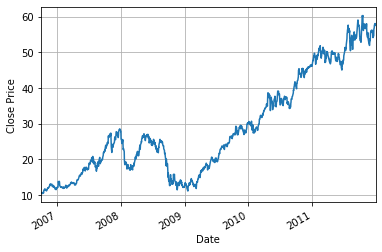

In [123]:
# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.ylabel('Close Price')
plt.show()

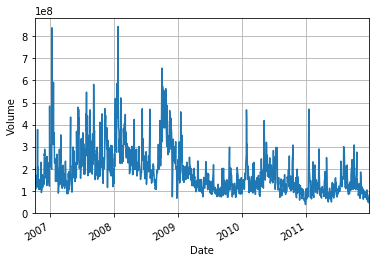

In [125]:
#Plot the volume of 'aapl'
aapl['Volume'].plot(grid = True)
plt.ylabel('Volume')
plt.show()

## Common Financial Analysis

#### Returns

In [105]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

Use pct_change() to calculate the daily percentage change. This does not take into account dividens and other factors and only the daily change in the value of stock over a day of trading

In [106]:
# Daily returns
daily_pct_c = daily_close.pct_change()

In [107]:
# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

In [109]:
# Inspect daily returns
print(daily_pct_c)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010420
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


Calculate the log returns to get a better insight into the growth of returns over time

In [110]:
# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

In [112]:
# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017397
2006-10-05  -0.007323
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006141
2011-12-30  -0.000296

[1323 rows x 1 columns]


If you want to calculate the returns in monthly or quarterly intervals

In [115]:
# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-30,0.134672,0.134987,0.132106,0.130488,0.735854,0.130489
2006-12-29,-0.078550,-0.084560,-0.089578,-0.074405,0.236584,-0.074406
2007-01-31,0.007026,0.011876,0.010840,0.010490,-0.204714,0.010491
2007-02-28,-0.004651,-0.016005,-0.021918,-0.013064,0.074066,-0.013065
...,...,...,...,...,...,...
2011-08-31,-0.007769,-0.005573,0.007559,-0.014469,-0.173887,-0.014469
2011-09-30,-0.008136,-0.001781,-0.008833,-0.009121,0.047943,-0.009121
2011-10-31,0.052560,0.052128,0.039523,0.061523,-0.296069,0.061523


In [118]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.126451,0.121460,0.125777,0.122860,0.369611,0.122860
2007-06-30,0.195413,0.198331,0.196030,0.197735,-0.080296,0.197735
2007-10-31,0.404613,0.392010,0.400961,0.400796,0.306882,0.400796
2008-02-29,0.130711,0.117746,0.127066,0.120394,0.172293,0.120394
2008-06-30,-0.004290,0.005927,-0.003550,0.003673,-0.209762,0.003673
2008-10-31,-0.108879,-0.124618,-0.114267,-0.118803,0.133219,-0.118803
2009-02-28,-0.363388,-0.359305,-0.363639,-0.360865,-0.161601,-0.360865
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588


Another method of calculating the daily percentage change of a stock instead of using pct_change()

In [122]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010420
2006-10-04   0.017549
2006-10-05  -0.007296
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


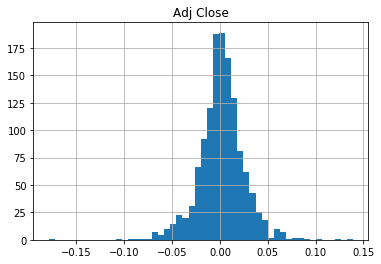

In [120]:
# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

In [126]:
# Pull up summary statistics
print(daily_pct_c.describe())

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139050


In [13]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989580
2006-10-04   1.006946
2006-10-05   0.999600
2006-10-06   0.991451
...               ...
2011-12-23   5.387790
2011-12-27   5.430537
2011-12-28   5.378574
2011-12-29   5.411703
2011-12-30   5.410099

[1323 rows x 1 columns]


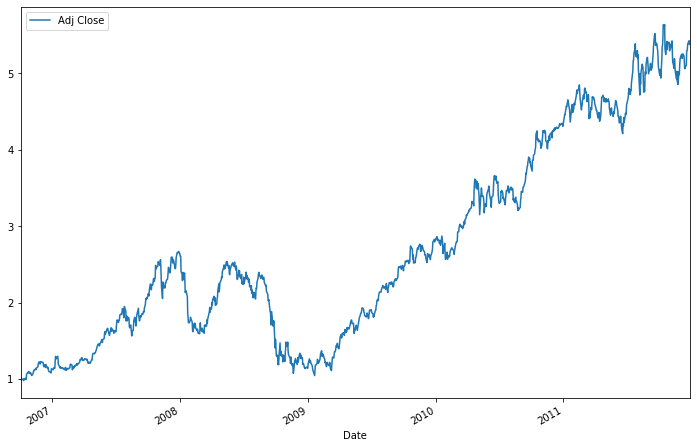

In [14]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [127]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2011-08-31   5.032896
2011-09-30   5.243032
2011-10-31   5.306305
2011-11-30   5.140465
2011-12-31   5.248871

[63 rows x 1 columns]


Function to get more stock prices, you need to input the Ticker 

In [128]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800.0   
       2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200.0   
       2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700.0   
       2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800.0   
       2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700.0   

                   Adj Close  
Ticker Date                   
AAPL   2006-10-02   9.333044  
       2006-10-03   9.235797  
       2006-10-04   9.397876  
       2006-10-05   9.329307  
       2006-10-06   9.253254

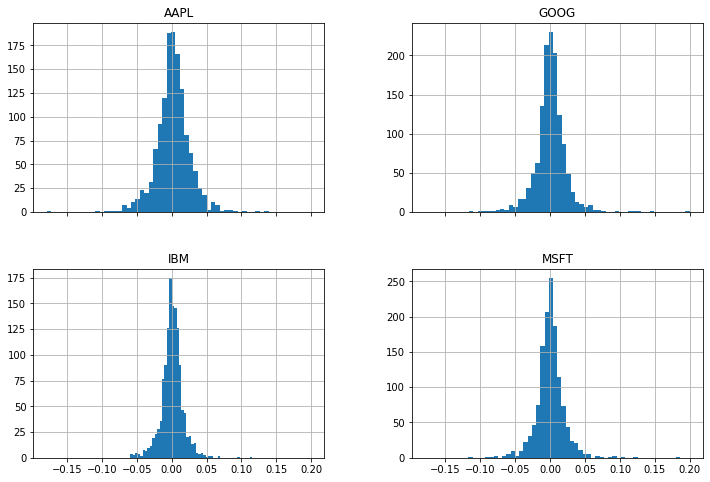

In [130]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

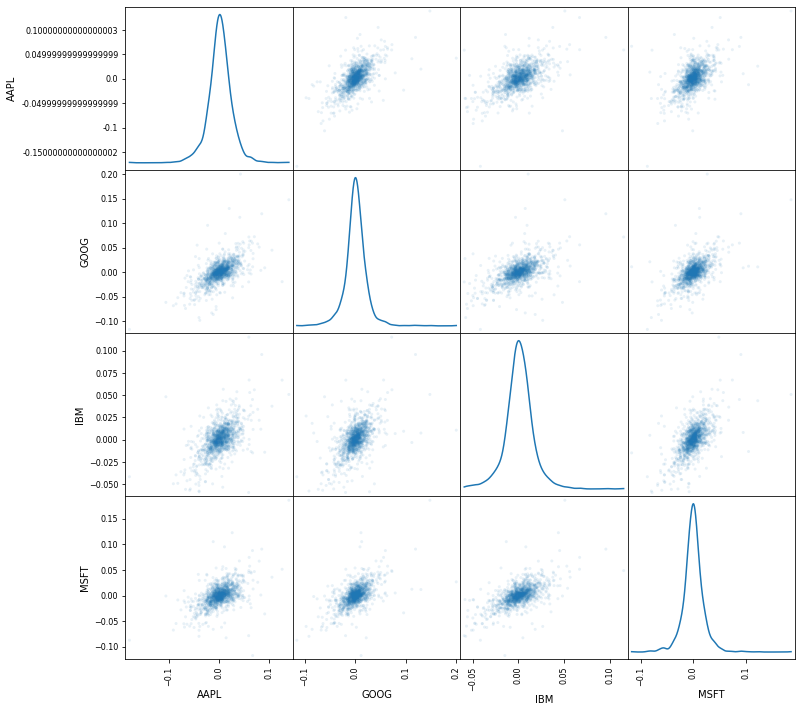

In [135]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

Use Seaborn package to create a plot which shows the relationship between two stocks. Similar to the one above using matplotlib

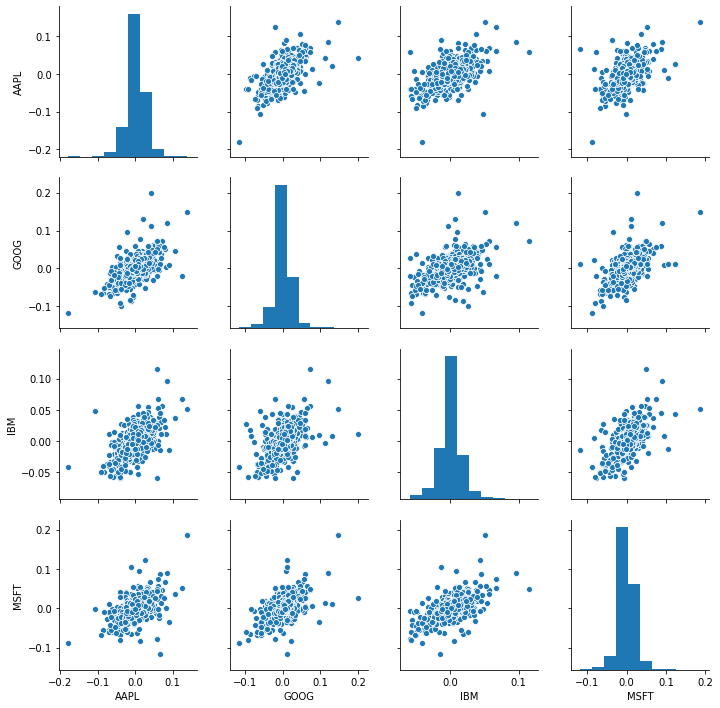

In [137]:
sns.pairplot(daily_pct_change)

### Moving windows

In [18]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2011-12-16    48.461483
2011-12-19    48.428257
2011-12-20    48.397650
2011-12-21    48.393536
2011-12-22    48.387146
2011-12-23    48.382907
2011-12-27    48.387832
2011-12-28    48.381162
2011-12-29    48.407999
2011-12-30    48.431655
Name: Adj Close, dtype: float64

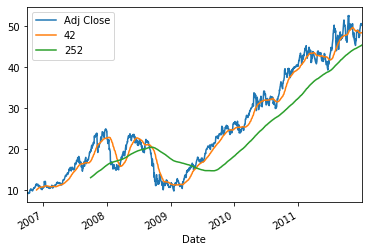

In [140]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

### Volatility calculation

Change in variance in the returns of a stock over a period of time
<br>
The higher the volatility, the risker the investment is.
<br>
The size of the window will affect the final answer. The larger the periods, your result will become less representative. The smaller the periods, the result will come closer to the standard deviation.

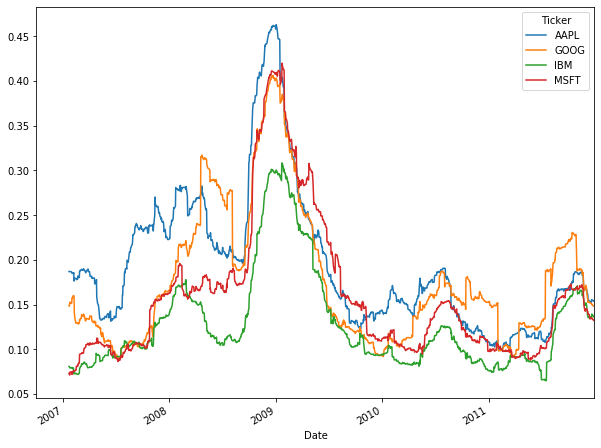

In [143]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### OLS Regression
<br>
Ordinary Least Square Regression
<br>
It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.
<br>
Definition found from: https://www.encyclopedia.com/social-sciences/applied-and-social-sciences-magazines/ordinary-least-squares-regression

In [142]:
#Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           1.33e-96
Time:                        20:18:11   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

NameError: name 'return_data' is not defined

In [ ]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

Building a strategy with Python

In [25]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()


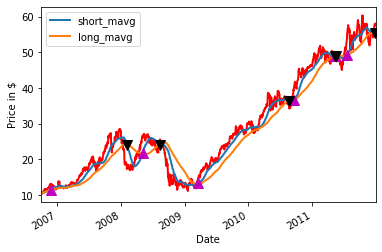

In [26]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

Backtesting a strategy

Implementation Of A Simple Backtester With Pandas

In [27]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

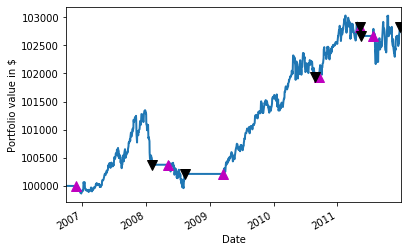

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()


Evaluating Moving Average Crossover Strategy

Sharpe Ratio

In [30]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.7259347313290616



Maximum Drawdown

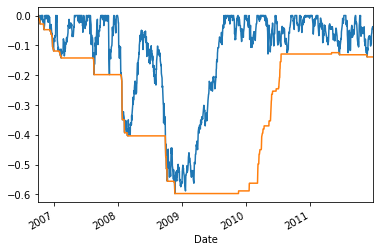

In [31]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

Compound Annual Growth Rate (CAGR)

In [32]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.38234461393881247
